In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('dados_Velozalugue.csv')

In [3]:
print(df.isnull().sum())

ID_CLIENTE          0
NOME_CLIENTE        0
CPF                 0
ENDEREÇO_CLIENTE    0
TELEFONE_CLIENTE    0
ID_CARROS           0
MODELO              0
CLASSE              0
PLACA               0
PREÇO-CLASSE        0
ID_DIARIA           0
QTD_DIARIA          0
PREÇO_DIARIA        0
ID_AGENCIA          0
NOME_AGENCIA        0
ENDEREÇO_AGENCIA    0
TELEFONE_AGENCIA    0
ID_FUNCIONARIO      0
NOME_FUNCIONARIO    0
FUNÇÃO              0
dtype: int64


In [4]:
# Preencher valores ausentes com a média para colunas numéricas
for coluna in df.select_dtypes(include=['float64', 'int64']).columns:
    df[coluna].fillna(df[coluna].mean(), inplace=True)

# Preencher valores ausentes com 'desconhecido' para colunas categóricas
for coluna in df.select_dtypes(include=['object']).columns:
    df[coluna].fillna('desconhecido', inplace=True)

In [5]:
for coluna in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df[coluna] = np.where(df[coluna] < limite_inferior, limite_inferior, df[coluna])
    df[coluna] = np.where(df[coluna] > limite_superior, limite_superior, df[coluna])

In [6]:
for coluna in df.select_dtypes(include=['object']).columns:
    df[coluna] = df[coluna].str.strip().str.lower()

In [7]:
# Converter colunas de data (exemplo: 'data' é o nome da coluna)
if 'data' in df.columns:
    df['data'] = pd.to_datetime(df['data'], errors='coerce')

In [8]:
  # Supondo que há uma coluna 'distancia_km' que precisa ser convertida para metros
if 'distancia_km' in df.columns:
    df['distancia_m'] = df['distancia_km'] * 1000
    df.drop(columns='distancia_km', inplace=True)

In [9]:
print("Informações do dataframe após a limpeza:")
print(df.info())
print(df.head())

Informações do dataframe após a limpeza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_CLIENTE        30 non-null     float64
 1   NOME_CLIENTE      30 non-null     object 
 2   CPF               30 non-null     object 
 3   ENDEREÇO_CLIENTE  30 non-null     object 
 4   TELEFONE_CLIENTE  30 non-null     object 
 5   ID_CARROS         30 non-null     float64
 6   MODELO            30 non-null     object 
 7   CLASSE            30 non-null     object 
 8   PLACA             30 non-null     object 
 9   PREÇO-CLASSE      30 non-null     float64
 10  ID_DIARIA         30 non-null     float64
 11  QTD_DIARIA        30 non-null     float64
 12  PREÇO_DIARIA      30 non-null     float64
 13  ID_AGENCIA        30 non-null     float64
 14  NOME_AGENCIA      30 non-null     object 
 15  ENDEREÇO_AGENCIA  30 non-null     object 
 16  TELEF

In [10]:
df.to_csv('seu_arquivo_limpo.csv', index=False)


In [30]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Separar as características e a variável alvo
X = df.drop(columns=['ID_CLIENTE', 'NOME_CLIENTE', 'CPF', 'ENDEREÇO_CLIENTE', 'TELEFONE_CLIENTE',
                     'ID_CARROS', 'MODELO', 'CLASSE', 'PLACA', 'ID_DIARIA', 'QTD_DIARIA', 'ID_AGENCIA',
                     'NOME_AGENCIA', 'ENDEREÇO_AGENCIA', 'TELEFONE_AGENCIA', 'ID_FUNCIONARIO',
                     'NOME_FUNCIONARIO','FUNÇÃO'])  # Substitua 'target' pelo nome da sua coluna alvo
y = df['QTD_DIARIA' ]  # Substitua 'target' pelo nome da sua coluna alvo

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
from sklearn.metrics import confusion_matrix

In [23]:
# Avaliar matriz confusão
y_true = [80, 50, 80, 100, 50, 100]
y_pred = [100, 50, 100,800, 80, 100]

matriz_confusao = confusion_matrix(y_true, y_pred)
print(matriz_confusao)

[[1 1 0 0]
 [0 0 2 0]
 [0 0 1 1]
 [0 0 0 0]]


In [24]:
# Criando uma instância do modelo de regressão linear
model = LinearRegression()

In [25]:
# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Fazendo previsões com os dados de validação
predictions = model.predict(X_test)

In [27]:
# Calculando as métricas
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Calculando RMSE a partir do MSE
r2 = r2_score(y_test, predictions)

In [28]:
# Exibindo as métricas
print("Erro Médio Absoluto (MAE):", mae)
print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)
print("R-quadrado (R²):", r2)


Erro Médio Absoluto (MAE): 2.8098290598290614
Erro Quadrático Médio (MSE): 11.894771805829514
Raiz do Erro Quadrático Médio (RMSE): 3.448879789994066
R-quadrado (R²): 0.7716880293193861


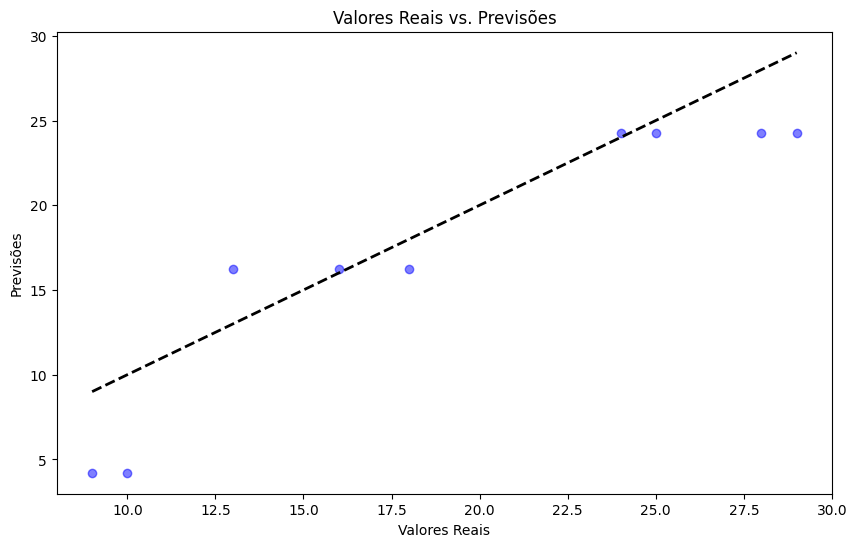

In [29]:
# Plotando as previsões em comparação com os valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões')
plt.show()

In [33]:
# Estatísticas descritivas
for coluna in df.select_dtypes(include=['float64', 'int64']).columns:
    media = df[coluna].mean()
    mediana = df[coluna].median()
    desvio_padrao = df[coluna].std()

    print(f'Coluna: {coluna}')
    print(f'Média: {media}')
    print(f'Mediana: {mediana}')
    print(f'Desvio Padrão: {desvio_padrao}')
    print('-' * 30)

Coluna: ID_CLIENTE
Média: 15.5
Mediana: 15.5
Desvio Padrão: 8.803408430829505
------------------------------
Coluna: ID_CARROS
Média: 115.5
Mediana: 115.5
Desvio Padrão: 8.803408430829505
------------------------------
Coluna: PREÇO-CLASSE
Média: 76.66666666666667
Mediana: 80.0
Desvio Padrão: 20.89932078311164
------------------------------
Coluna: ID_DIARIA
Média: 0.0
Mediana: 0.0
Desvio Padrão: 0.0
------------------------------
Coluna: QTD_DIARIA
Média: 15.5
Mediana: 15.5
Desvio Padrão: 8.803408430829505
------------------------------
Coluna: PREÇO_DIARIA
Média: 30.0
Mediana: 30.0
Desvio Padrão: 0.0
------------------------------
Coluna: ID_AGENCIA
Média: 0.0
Mediana: 0.0
Desvio Padrão: 0.0
------------------------------
Coluna: ID_FUNCIONARIO
Média: 50509.0
Mediana: 50505.5
Desvio Padrão: 51372.464350547525
------------------------------


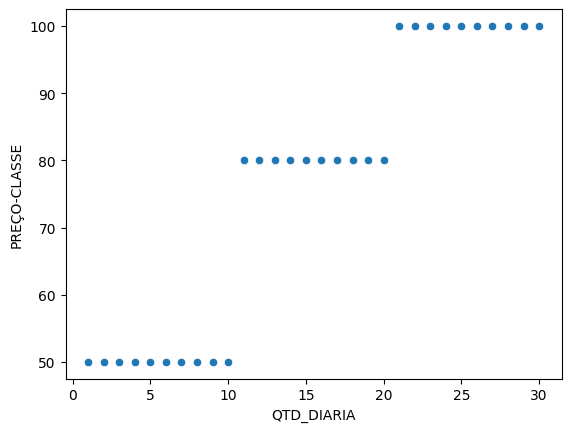

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersão
sns.scatterplot(x='QTD_DIARIA', y='PREÇO-CLASSE', data=df)
plt.show()

In [42]:
# Identificar padrões
tendencia = df['PREÇO-CLASSE'].value_counts()
print(tendencia)

PREÇO-CLASSE
50.0     10
80.0     10
100.0    10
Name: count, dtype: int64


In [47]:
# Função para calcular estatísticas descritivas das colunas numéricas
def calcular_estatisticas_descritivas(df):
    estatisticas = {}
    for coluna in df.select_dtypes(include=['float64', 'int64']).columns:
        media = df[coluna].mean()
        mediana = df[coluna].median()
        desvio_padrao = df[coluna].std()
        estatisticas[coluna] = {'Média': media, 'Mediana': mediana, 'Desvio Padrão': desvio_padrao}
    return estatisticas

def avaliar_modelo1(df):
    # Vamos usar as estatísticas descritivas das colunas numéricas como pontuação do modelo
    estatisticas = calcular_estatisticas_descritivas(df)
    pontuacao_modelo = sum(estatisticas[coluna]['Média'] for coluna in estatisticas)
    return pontuacao_modelo

def avaliar_modelo2(df):
    # Vamos usar as estatísticas descritivas das colunas numéricas como pontuação do modelo
    estatisticas = calcular_estatisticas_descritivas(df)
    pontuacao_modelo = sum(estatisticas[coluna]['Desvio Padrão'] for coluna in estatisticas)
    return pontuacao_modelo

# Comparar modelos
resultado1 = avaliar_modelo1(df)
resultado2 = avaliar_modelo2(df)

if resultado1 > resultado2:
    print('Modelo 1 é melhor.')
else:
    print('Modelo 2 é melhor.')

Modelo 2 é melhor.
